### Challenge Set 6
Topic:        Classification 

Date:         07/31/2016

Name:         sravanthi ponnana

In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [296]:
df = pd.read_csv('/Users/Manoj/Downloads/house-votes-84.data', header = None)

In [297]:
df[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


### Challenge 1

In [298]:
df = df.replace('y',1)
df = df.replace('n',0)

df[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


In [299]:
df = df.replace('?',np.nan)
df = df.fillna(df.mean())
df[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


### Challenge 2

In [300]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.values[:,1:],df.values[:,0],test_size=.30, random_state=4444)

### Challenge 3

In [301]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
score = []
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    score.append(accuracy_score(y_test, neigh.predict(X_test)))
score = np.array(score)
print(max(score)) 
index = np.where(score == max(score))
print(np.array(index)+1)

0.931297709924
[[ 6  9 10]]


K- values of 6,9 and 10 give the maximum accuracy of 0.931297709924

### Challenge 4

In [302]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', fit_intercept=True)
model.fit(X_train, y_train) 
print(accuracy_score(y_test, model.predict(X_test)))

0.93893129771


### Challenge 5

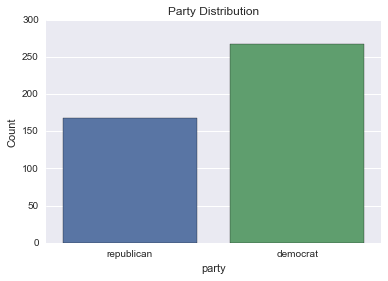

In [303]:
ax = sns.countplot(x=0, data=df)
ax.set(xlabel="party",ylabel="Count",title = "Party Distribution")

In [304]:
def predict_rep(x):
    sh = x.shape[0]
    return ['republican']*sh

print(accuracy_score(df.values[:,0], predict_rep(df.values[:,1:])))

0.386206896552


In [305]:
def predict_demo(x):
    sh = x.shape[0]
    return ['democrat']*sh

print(accuracy_score(df.values[:,0], predict_demo(df.values[:,1:])))

0.613793103448


### Challenge 6

In [306]:
import matplotlib.patches as mpatches

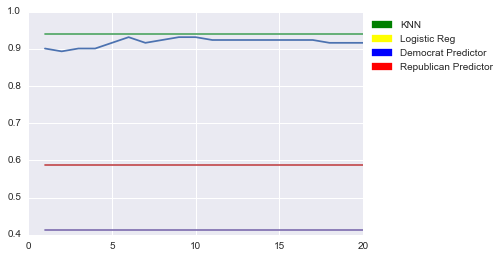

In [307]:
plt.plot(range(1,21),score,label='knn');
plt.plot(range(1,21),[accuracy_score(y_test,model.predict(X_test))]*20)
plt.plot(range(1,21),[accuracy_score(y_test,predict_demo(X_test))]*20)
plt.plot(range(1,21),[accuracy_score(y_test,predict_rep(X_test))]*20)
green = mpatches.Patch(color='green', label='KNN')
yellow = mpatches.Patch(color='yellow', label='Logistic Reg')
blue = mpatches.Patch(color='blue', label='Democrat Predictor')
red = mpatches.Patch(color='red', label='Republican Predictor')
plt.legend(handles=[green, yellow, blue, red], bbox_to_anchor=(1, 1), loc = "best")

### Challenge 7

In [308]:
from sklearn.learning_curve import learning_curve

In [309]:
log_learn = learning_curve(model, df.values[:,1:], df.values[:,0])
log_learn

(array([ 29,  94, 159, 224, 290]),
 array([[ 1.        ,  0.96551724,  0.96551724],
        [ 0.9893617 ,  0.9787234 ,  0.9787234 ],
        [ 0.98113208,  0.97484277,  0.97484277],
        [ 0.98214286,  0.97321429,  0.98214286],
        [ 0.96896552,  0.96551724,  0.97241379]]),
 array([[ 0.97241379,  0.89655172,  0.88965517],
        [ 0.97241379,  0.91724138,  0.89655172],
        [ 0.97241379,  0.93103448,  0.91724138],
        [ 0.97241379,  0.95172414,  0.93103448],
        [ 0.97931034,  0.96551724,  0.93793103]]))

In [310]:
train_cv_err = np.mean(log_learn[1], axis=1)
test_cv_err = np.mean(log_learn[2], axis=1)

In [311]:
train_cv_err

array([ 0.97701149,  0.9822695 ,  0.9769392 ,  0.97916667,  0.96896552])

In [312]:
m = log_learn[0]

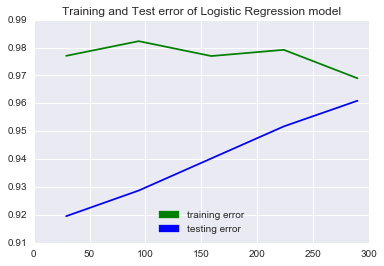

In [313]:
plt.plot(m, train_cv_err, 'green')
plt.plot(m, test_cv_err, 'blue')
green = mpatches.Patch(color='green', label='training error')
blue = mpatches.Patch(color='blue', label='testing error')
plt.legend(handles=[green, blue], loc = 8 )
plt.title('Training and Test error of Logistic Regression model')

In [314]:
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(df.values[:,1:], df.values[:,0])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [315]:
knn_learn = learning_curve(neigh, df.values[:,1:], df.values[:,0])
knn_learn

(array([ 29,  94, 159, 224, 290]),
 array([[ 0.89655172,  0.96551724,  0.96551724],
        [ 0.91489362,  0.96808511,  0.96808511],
        [ 0.93710692,  0.96855346,  0.97484277],
        [ 0.94196429,  0.97321429,  0.96428571],
        [ 0.92758621,  0.94482759,  0.96206897]]),
 array([[ 0.95172414,  0.90344828,  0.89655172],
        [ 0.95862069,  0.90344828,  0.90344828],
        [ 0.95172414,  0.89655172,  0.93103448],
        [ 0.94482759,  0.89655172,  0.93103448],
        [ 0.94482759,  0.92413793,  0.93103448]]))

In [316]:
m = knn_learn[0]
train_cv_err = np.mean(knn_learn[1], axis=1)
test_cv_err = np.mean(knn_learn[2], axis=1)

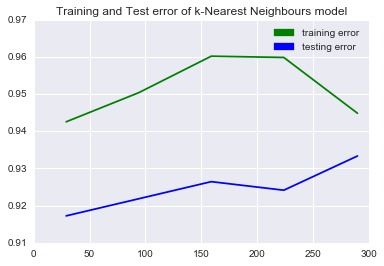

In [317]:
plt.plot(m, train_cv_err, 'green')
plt.plot(m, test_cv_err, 'blue')
green = mpatches.Patch(color='green', label='training error')
blue = mpatches.Patch(color='blue', label='testing error')
plt.legend(handles=[green, blue], loc = "best" )
plt.title('Training and Test error of k-Nearest Neighbours model')

### Challenge 8

In [318]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [319]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
print(accuracy_score(y_test, nb_model.predict(X_test)))

0.93893129771


In [320]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
print(accuracy_score(y_test, svc_model.predict(X_test)))

0.954198473282


In [321]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train,y_train)
print(accuracy_score(y_test, DT_model.predict(X_test)))

0.946564885496


In [322]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
print(accuracy_score(y_test, rf_model.predict(X_test)))

0.961832061069


### Challenge 9

In [323]:
from sklearn.cross_validation import cross_val_score

In [324]:
log_cross_score = cross_val_score(model, X_train, y_train)
mean_log_cross_score = np.mean(log_cross_score)
print(mean_log_cross_score)

0.967190836731


In [325]:
knn_cross_score = cross_val_score(neigh, X_train, y_train)
mean_knn_cross_score = np.mean(knn_cross_score)
print(mean_knn_cross_score)

0.931048987252


In [326]:
svc_cross_score = cross_val_score(svc_model, X_train, y_train)
mean_svc_cross_score = np.mean(svc_cross_score)
print(mean_svc_cross_score)

0.963922862875


In [327]:
gauss_cross_score = cross_val_score(nb_model, X_train, y_train)
mean_gauss_cross_score = np.mean(gauss_cross_score)
print(mean_gauss_cross_score)

0.927748657219


In [328]:
dtc_cross_score = cross_val_score(DT_model, X_train, y_train)
mean_dtc_cross_score = np.mean(dtc_cross_score)
print(mean_dtc_cross_score)

0.94742121271


In [329]:
rfc_cross_score = cross_val_score(rf_model, X_train, y_train)
mean_rfc_cross_score = np.mean(rfc_cross_score)
print(mean_rfc_cross_score)


0.950786255096


### Challenge 10

In [330]:
df = pd.read_csv('/Users/Manoj/Downloads/house-votes-84.data', header = None)

In [331]:
df = df.replace('y',1)
df = df.replace('n',0)

df[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


In [332]:
df = df.replace('?',np.nan)
df = df.drop([0],axis=1)
df = df.fillna(df.mode().loc[0])

In [333]:
df[:5]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [334]:
X_train, X_test, y_train, y_test = train_test_split(df.values[:,1:],df.values[:,0], test_size=.30, random_state=4444)

In [335]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', fit_intercept=True)
model.fit(X_train, y_train) 
log_cross_score = cross_val_score(model, X_train, y_train)
mean_log_cross_score = np.mean(log_cross_score)
print(mean_log_cross_score)


0.73678250178


### Challenge 11

In [336]:
movies = pd.read_csv('/Users/Manoj/Documents/metis/2013_movies.csv')

In [337]:
movies[:2]

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00


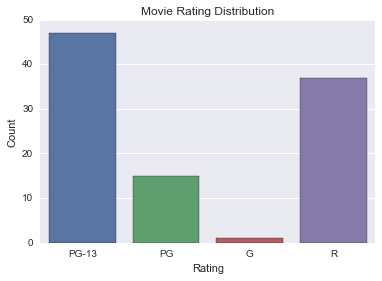

In [338]:
ax = sns.countplot(x="Rating", data=movies)
ax.set(xlabel="Rating",ylabel="Count",title = "Movie Rating Distribution")

In [339]:
def stupid_pred(x):
    return [x.mode()[0]]*x.shape[0]


In [340]:
movies = movies.dropna()
X = movies[["Budget","DomesticTotalGross","Runtime"]]
y = movies["Rating"]

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [342]:
score = []
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    score.append(accuracy_score(y_test, neigh.predict(X_test)))
score = np.array(score)
print(max(score)) 
index = np.where(score == max(score))
print(np.array(index)+1)

0.555555555556
[[4 5]]


In [343]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', fit_intercept=True)
model.fit(X_train, y_train) 
print(accuracy_score(y_test, model.predict(X_test)))

0.444444444444


In [344]:
accuracy_score(y_test, stupid_pred(y_test))

0.40740740740740738

In [345]:
model.classes_

array(['PG', 'PG-13', 'R'], dtype=object)

In [346]:
model.coef_

array([[ -1.46124379e-08,  -1.93897623e-09,  -1.75965536e-13],
       [  1.49848414e-08,  -6.42667083e-09,  -9.13751595e-14],
       [ -2.30763200e-08,   5.12598612e-09,   1.16458130e-13]])

### Challenge 12

In [347]:
survival_data = pd.read_csv('/Users/Manoj/Downloads/haberman.data', names=['age', 'year', 'pos_nodes', 'survival_status'])

In [348]:
survival_data[:2]

,age,year,pos_nodes,survival_status
0,30,64,1,1
1,30,62,3,1


In [349]:
print("Mean age:",survival_data["age"].mean(),"Standard Deviation of Age:",survival_data["age"].std())
print("Mean age:",survival_data[survival_data["survival_status"]==1]["age"].mean(),"Standard Deviation of Age:",survival_data[survival_data["survival_status"]==1]["age"].std())
print("Mean age:",survival_data[survival_data["survival_status"]==2]["age"].mean(),"Standard Deviation of Age:",survival_data[survival_data["survival_status"]==2]["age"].std())

Mean age: 52.45751633986928 Standard Deviation of Age: 10.80345234930328
Mean age: 52.01777777777778 Standard Deviation of Age: 11.012154179929546
Mean age: 53.67901234567901 Standard Deviation of Age: 10.16713720829741


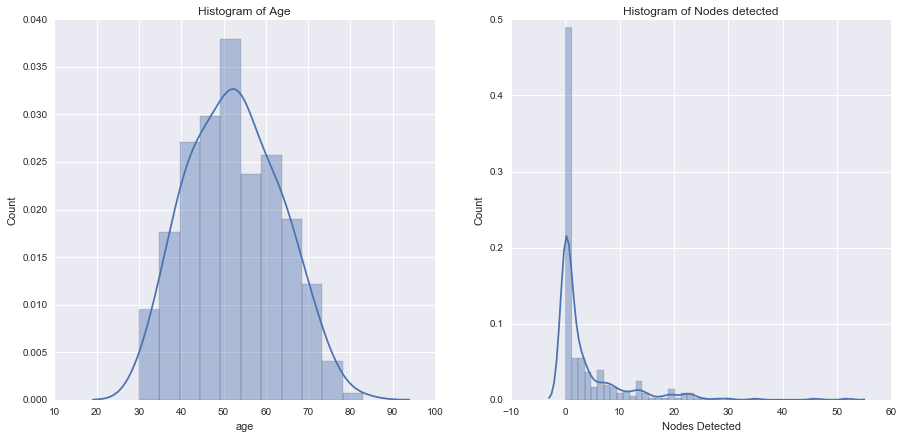

In [350]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(221)
ax = sns.distplot(survival_data.age)
ax.set(xlabel="age",ylabel="Count",title = "Histogram of Age")
ax1 = fig.add_subplot(222)
ax1 = sns.distplot(survival_data.pos_nodes)
ax1.set(xlabel="Nodes Detected",ylabel="Count",title = "Histogram of Nodes detected")

In [351]:
min(survival_data.year)

58

In [352]:
max(survival_data.year)

69

In [353]:
X_train, X_test, y_train, y_test = train_test_split(survival_data.values[:,[0,1,2]],survival_data.values[:,3], test_size=.30, random_state=4444)
model = LogisticRegression(penalty='l2', fit_intercept=True)
model.fit(X_train, y_train) 
print(accuracy_score(y_test, model.predict(X_test)))

0.815217391304


In [354]:
model = LogisticRegression(penalty='l2', fit_intercept=True)
model.fit(X_train, y_train) 
log_cross_score = cross_val_score(model, X_train, y_train)
mean_log_cross_score = np.mean(log_cross_score)
print(mean_log_cross_score)



0.696335419927


In [355]:
model.coef_

array([[ 0.0155515 , -0.02899279,  0.07136197]])

In [356]:
log_learn = learning_curve(model, survival_data.values[:,[0,1,2]],survival_data.values[:,3])

In [357]:
log_learn

(array([ 20,  66, 112, 158, 204]),
 array([[ 0.85      ,  0.9       ,  0.9       ],
        [ 0.8030303 ,  0.81818182,  0.81818182],
        [ 0.75      ,  0.77678571,  0.77678571],
        [ 0.73417722,  0.75316456,  0.77848101],
        [ 0.74019608,  0.75490196,  0.74019608]]),
 array([[ 0.75490196,  0.73529412,  0.73529412],
        [ 0.75490196,  0.68627451,  0.29411765],
        [ 0.74509804,  0.74509804,  0.28431373],
        [ 0.7745098 ,  0.73529412,  0.66666667],
        [ 0.76470588,  0.71568627,  0.7745098 ]]))

In [358]:
m = log_learn[0]

In [359]:
train_cv_err = np.mean(log_learn[1], axis=1)
test_cv_err = np.mean(log_learn[2], axis=1)

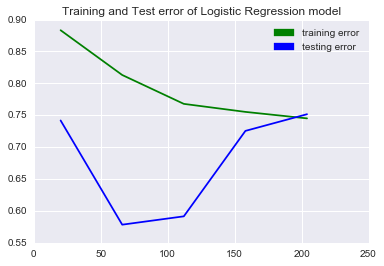

In [360]:
plt.plot(m, train_cv_err, 'green')
plt.plot(m, test_cv_err, 'blue')
green = mpatches.Patch(color='green', label='training error')
blue = mpatches.Patch(color='blue', label='testing error')
plt.legend(handles=[green, blue], loc = "best")
plt.title('Training and Test error of Logistic Regression model')